In [265]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [266]:
fd=pd.read_csv('train.csv')

In [267]:
fd1=pd.read_csv('test.csv')

In [268]:
fd.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [269]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [270]:
df=fd.copy()

In [271]:
df.shape

(233154, 41)

In [272]:
df.loan_default.value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

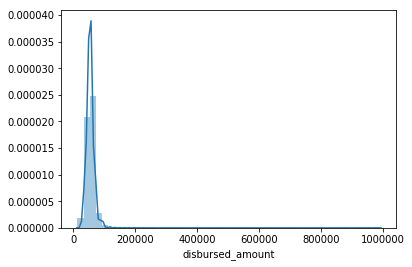

In [273]:
sns.distplot(df.disbursed_amount)

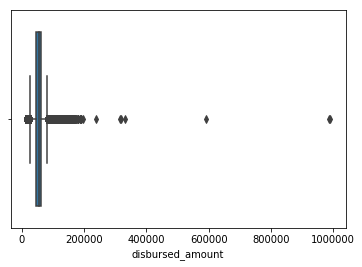

In [274]:
sns.boxplot(df.disbursed_amount)

In [275]:
df=df[df['disbursed_amount']<200000].reset_index(drop=True)

In [276]:
df.isna().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7660
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [277]:
df['Employment.Type'].unique()

array(['Salaried', 'Self employed', nan], dtype=object)

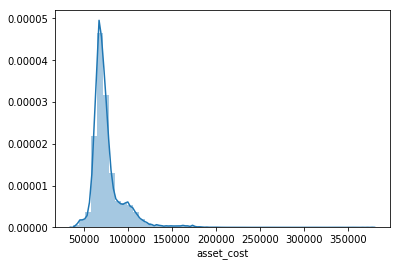

In [278]:
sns.distplot(df.asset_cost)

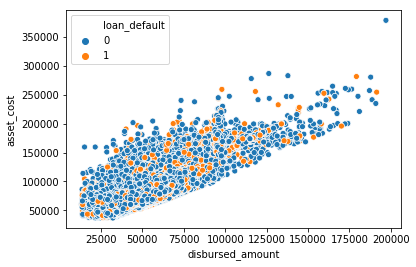

In [279]:
sns.scatterplot(y=df.asset_cost, x=df.disbursed_amount,hue=df.loan_default)

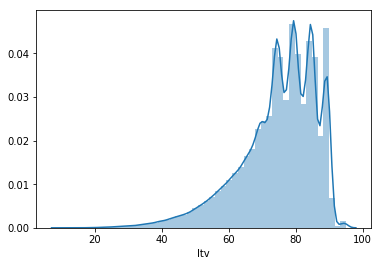

In [280]:
sns.distplot(df.ltv)

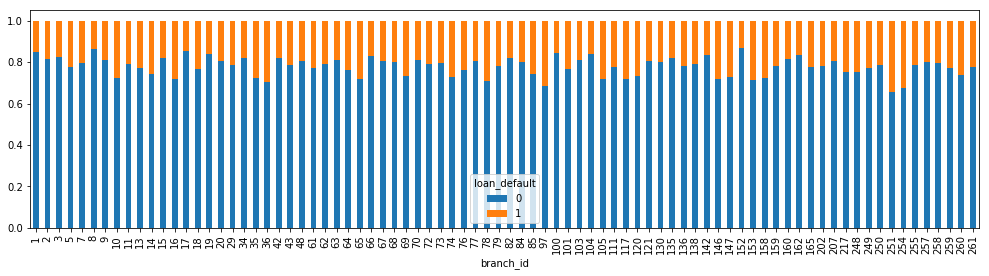

In [281]:
ct=pd.crosstab(df.branch_id, df.loan_default)
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))

In [282]:
df.supplier_id.nunique()

2952

In [283]:
df.manufacturer_id.nunique()

10

(463.02843043903846,
 4.6948116493874514e-94,
 9,
 array([[4.43337617e+04, 1.22922383e+04],
        [1.30826327e+04, 3.62736733e+03],
        [8.00068362e+03, 2.21831638e+03],
        [2.12986199e+04, 5.90538006e+03],
        [1.88292828e+03, 5.22071719e+02],
        [8.57566180e+04, 2.37773820e+04],
        [7.56146417e+03, 2.09653583e+03],
        [6.09113598e+02, 1.68886402e+02],
        [7.82922362e-01, 2.17077638e-01],
        [9.39506835e+00, 2.60493165e+00]]))

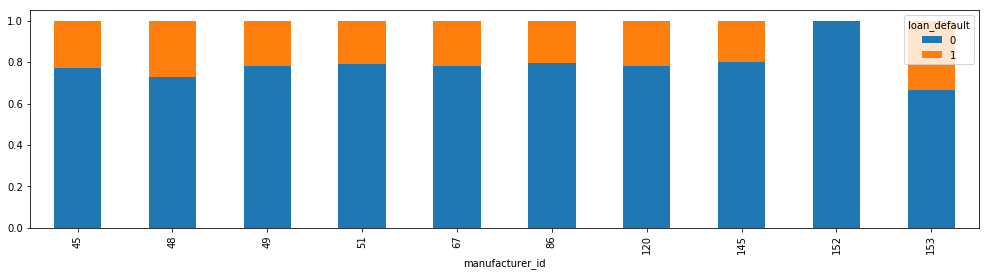

In [284]:
ct=pd.crosstab(df.manufacturer_id, df.loan_default)
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))
from scipy import stats
stats.chi2_contingency(ct)

(402.9347894941585,
 1.2649508029241105e-89,
 1,
 array([[ 29148.19954792,   8081.80045208],
        [153387.80045208,  42529.19954792]]))

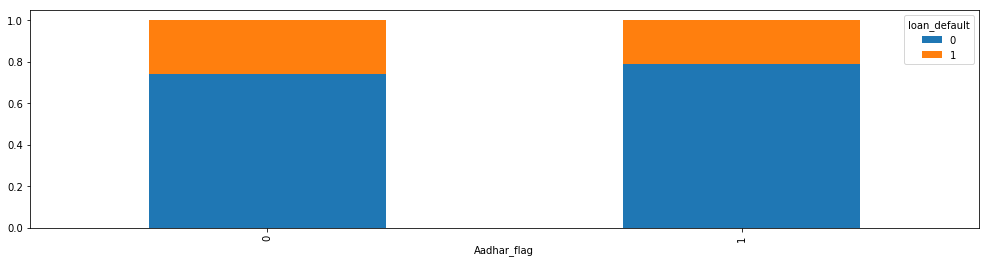

In [285]:
ct=pd.crosstab(df.Aadhar_flag, df.loan_default)
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))
from scipy import stats
stats.chi2_contingency(ct)

(1.00265262619473,
 0.31666950015785755,
 1,
 array([[168744.82258832,  46787.17741168],
        [ 13791.17741168,   3823.82258832]]))

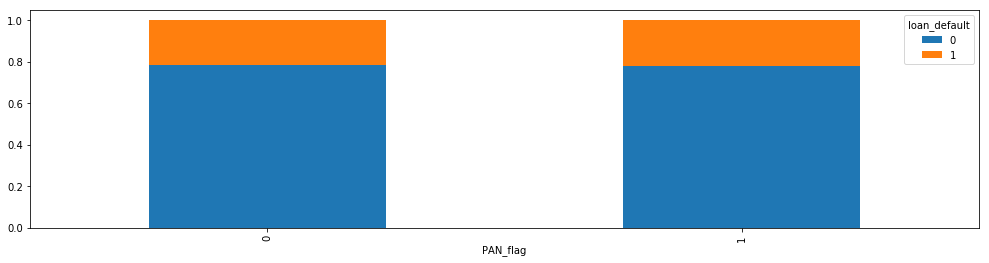

In [286]:
ct=pd.crosstab(df.PAN_flag, df.loan_default)
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))
from scipy import stats
stats.chi2_contingency(ct)

(445.7687139225628,
 6.011323264115359e-99,
 1,
 array([[156077.92168889,  43275.07831111],
        [ 26458.07831111,   7335.92168889]]))

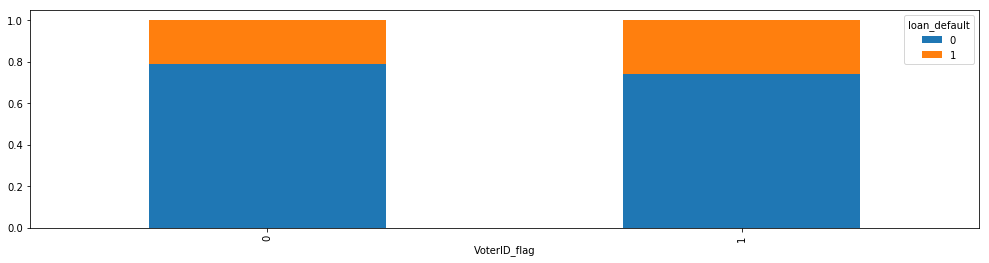

In [287]:
ct=pd.crosstab(df.VoterID_flag, df.loan_default)
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))
from scipy import stats
stats.chi2_contingency(ct)

(7.81450600180469,
 0.005182851325497511,
 1,
 array([[178293.34371877,  49434.65628123],
        [  4242.65628123,   1176.34371877]]))

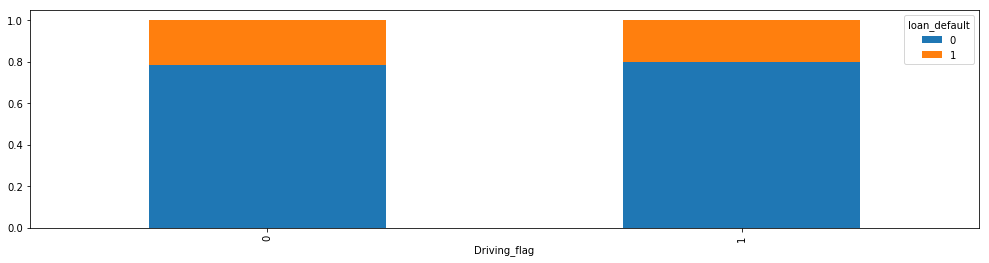

In [288]:
ct=pd.crosstab(df.Driving_flag, df.loan_default)
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))
from scipy import stats
stats.chi2_contingency(ct)

(13.080179391070391,
 0.00029843687220371747,
 1,
 array([[1.82147671e+05, 5.05033295e+04],
        [3.88329492e+02, 1.07670508e+02]]))

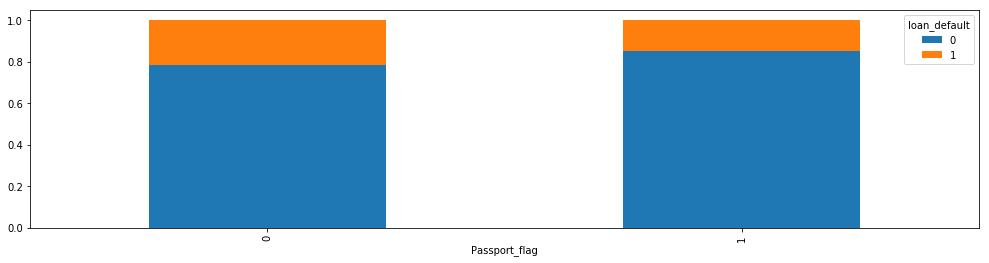

In [289]:
ct=pd.crosstab(df.Passport_flag, df.loan_default)
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))
from scipy import stats
stats.chi2_contingency(ct)

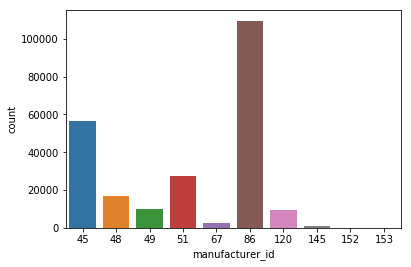

In [290]:
sns.countplot(x=df.manufacturer_id)

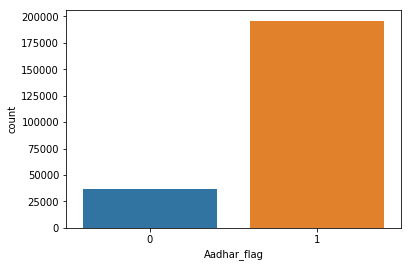

In [291]:
sns.countplot(x=df.Aadhar_flag)

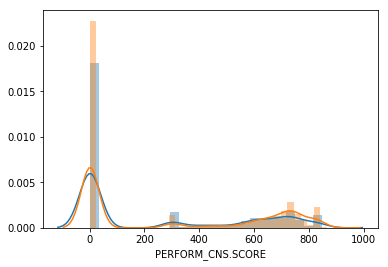

In [292]:
sns.distplot(df[df['loan_default']==1]['PERFORM_CNS.SCORE'])
sns.distplot(df[df['loan_default']==0]['PERFORM_CNS.SCORE'])

In [293]:
df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                116949
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9199
M-Very High Risk                                             8776
F-Low Risk                                                   8484
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3987
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3747
Not Scored: Not Enough Info available on the customer        3672
Not Scored

(2191.893143590023, 0.0, 19, array([[1.10579954e+04, 3.06600456e+03],
        [7.20210281e+03, 1.99689719e+03],
        [1.25619893e+04, 3.48301070e+03],
        [8.89243219e+03, 2.46556781e+03],
        [4.55739107e+03, 1.26360893e+03],
        [6.64231332e+03, 1.84168668e+03],
        [3.12151146e+03, 8.65488542e+02],
        [5.36693279e+03, 1.48806721e+03],
        [4.35069957e+03, 1.20630043e+03],
        [2.93361009e+03, 8.13389909e+02],
        [6.48024839e+03, 1.79675161e+03],
        [8.87833959e+02, 2.46166041e+02],
        [6.87092665e+03, 1.90507335e+03],
        [9.15619873e+04, 2.53870127e+04],
        [2.34876709e+00, 6.51232913e-01],
        [2.25794809e+03, 6.26051907e+02],
        [1.20100290e+03, 3.32997096e+02],
        [2.87489091e+03, 7.97109086e+02],
        [7.64132226e+02, 2.11867774e+02],
        [2.94770269e+03, 8.17297306e+02]]))

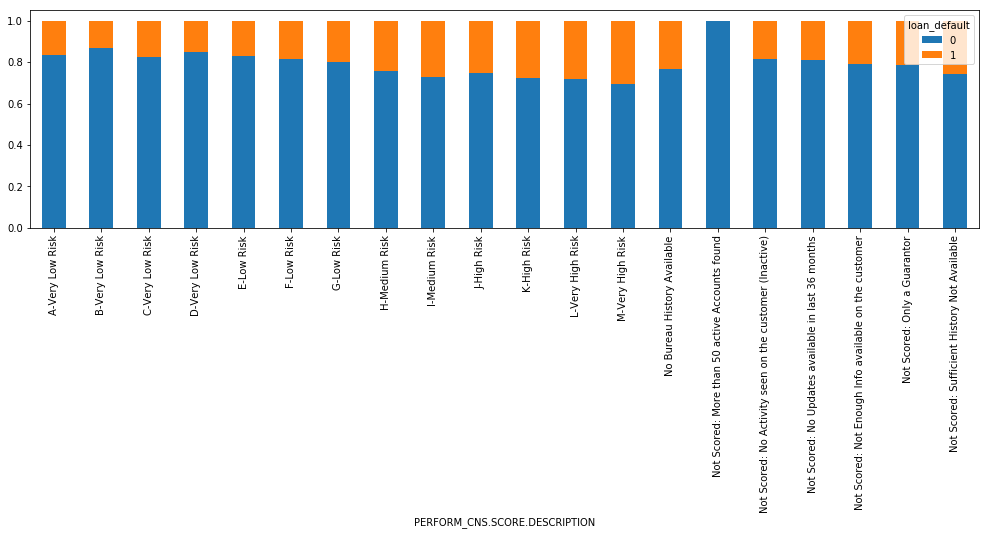

In [294]:
ct=pd.crosstab(df['PERFORM_CNS.SCORE.DESCRIPTION'], df.loan_default)
ct.div(ct.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(17,4))
from scipy import stats
stats.chi2_contingency(ct)

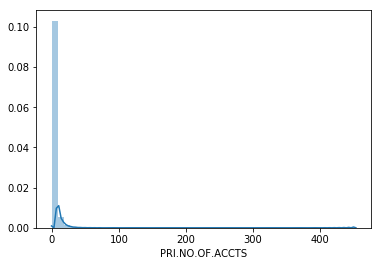

In [295]:
sns.distplot(df['PRI.NO.OF.ACCTS'])

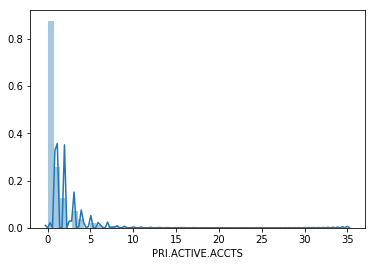

In [296]:
sns.distplot(df[df['loan_default']==1]['PRI.ACTIVE.ACCTS'])
#sns.distplot(df[df['loan_default']==0]['PRI.ACTIVE.ACCTS'])

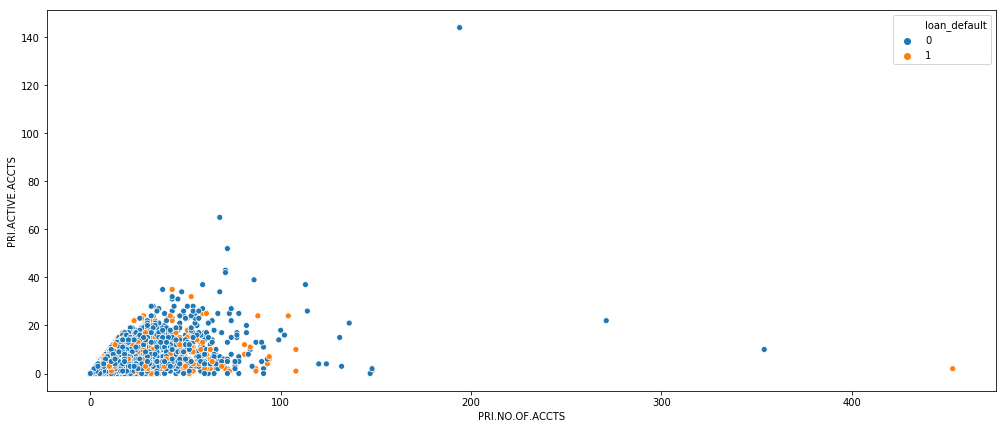

In [297]:
plt.subplots(figsize=(17,7))
sns.scatterplot(x=df['PRI.NO.OF.ACCTS'] , y = df['PRI.ACTIVE.ACCTS'],hue=df.loan_default)

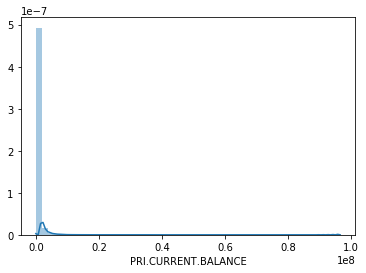

In [298]:
sns.distplot(df[df['PRI.CURRENT.BALANCE']>0]['PRI.CURRENT.BALANCE'])

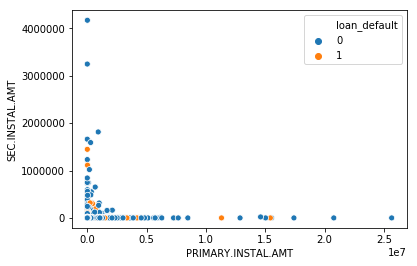

In [299]:
sns.scatterplot(x=df['PRIMARY.INSTAL.AMT'],  y=df['SEC.INSTAL.AMT'],hue=df['loan_default'])

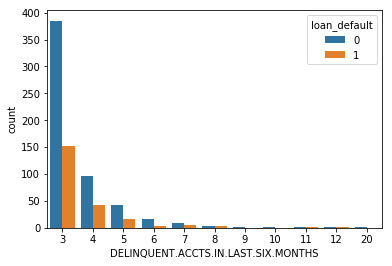

In [300]:
sns.countplot(df[df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']>2]['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'],hue=df.loan_default)

### Merge

In [301]:
fd['flag']=1
fd1['flag']=0
df=fd.append(fd1,sort=False)

In [302]:
df['Date.of.Birth']=pd.to_datetime(df['Date.of.Birth'], format='%d-%m-%y')
df['Age']=2019-df['Date.of.Birth'].dt.year

In [303]:
df['manufacturer_id']= df['manufacturer_id'].astype('category')

In [304]:
df['acc_age_year']=df['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[0])

df['acc_age_month']=df['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[1])

In [305]:
df['acc_age']=df['acc_age_year'].str.extract('(\d+)').astype(int)*12 + df['acc_age_month'].str.extract('(\d+)').astype(int)

In [306]:
df['credit_yr']=df['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[0])

df['credit_month']=df['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[1])

In [307]:
df['credit_hist_len']=df['credit_yr'].str.extract('(\d+)').astype(int)*12 + df['credit_month'].str.extract('(\d+)').astype(int)

In [308]:
df['costbyvalue']=df.disbursed_amount/(df.asset_cost+1)

In [363]:
df['valuebycost']=df.asset_cost/(df.disbursed_amount+1)

In [309]:
df['overdue_acc__ratio']=df['PRI.OVERDUE.ACCTS']/(df['PRI.NO.OF.ACCTS']+1)
df['overdue_acc__ratio'] = df['overdue_acc__ratio'].fillna(0)

In [310]:
df['disburs_ratio']= df['PRI.DISBURSED.AMOUNT'] /( df['PRI.SANCTIONED.AMOUNT']+1)
df['disburs_ratio'] = df['disburs_ratio'].fillna(0)

In [311]:
df['loan_ratio']=df['PRI.DISBURSED.AMOUNT']/(df.disbursed_amount+1)

In [312]:
df['leftover'] = df['SEC.CURRENT.BALANCE'] /(df['PRIMARY.INSTAL.AMT'] + df['SEC.INSTAL.AMT']+1) 

In [313]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,acc_age_month,acc_age,credit_yr,credit_month,credit_hist_len,costbyvalue,overdue_acc__ratio,disburs_ratio,loan_ratio,leftover
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0mon,0,0yrs,0mon,0,0.866047,0.0,0.00000,0.000000,0.0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,...,11mon,23,1yrs,11mon,23,0.719211,0.5,0.99998,1.064777,0.0
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0mon,0,0yrs,0mon,0,0.868271,0.0,0.00000,0.000000,0.0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,...,8mon,8,1yrs,3mon,15,0.869907,0.0,0.00000,0.000000,0.0
4,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0mon,0,0yrs,0mon,0,0.868609,0.0,0.00000,0.000000,0.0


In [364]:
X=df.drop(['Employment.Type' ,'State_ID','branch_id' ,'supplier_id' ,
           'UniqueID','Current_pincode_ID','Date.of.Birth','DisbursalDate','Employee_code_ID',
          'CREDIT.HISTORY.LENGTH','AVERAGE.ACCT.AGE','ltv','acc_age_year','acc_age_month',
           'credit_yr','credit_month'],1)
y=df[df['flag']==1].loan_default.reset_index(drop=True)

In [365]:
X=pd.get_dummies(X)

In [366]:
X.shape

(345546, 69)

In [367]:
test=X[X['flag']==0].reset_index(drop=True)
X=X[X['flag']==1].reset_index(drop=True)

In [368]:
test.shape,X.shape

((112392, 69), (233154, 69))

In [369]:
X['Employee_code_ID']=fd['Employee_code_ID']

In [370]:
test['Employee_code_ID']=fd1['Employee_code_ID']

In [371]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [372]:
from sklearn.model_selection import train_test_split

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

### Response rate 

In [374]:
rr=X_train.groupby('Employee_code_ID').agg({'loan_default':'sum','Employee_code_ID':'count'})

In [375]:
rr['rr']=rr['loan_default']/rr['Employee_code_ID']

In [376]:
X_train['emp_rr']=X_train['Employee_code_ID'].map(rr['rr'])
X_test['emp_rr']=X_test['Employee_code_ID'].map(rr['rr'])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [377]:
test['emp_rr']=test['Employee_code_ID'].map(rr['rr'])

In [378]:
test=test.drop(['loan_default','Employee_code_ID'],1)

In [379]:
test.shape, X_train.shape, X_test.shape

((112392, 69), (156213, 71), (76941, 71))

In [380]:
X_train=X_train.drop(['loan_default','Employee_code_ID'],1)

In [381]:
X_test=X_test.drop(['loan_default','Employee_code_ID'],1)

### random forest

In [332]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=12, random_state=123,
                                min_samples_leaf=5,min_samples_split=10,
                             class_weight='balanced',max_features=.8).fit(X_train,y_train)

In [333]:
accuracy_score(y_train, clf.predict(X_train)) , roc_auc_score(y_train,clf.predict(X_train))

(0.710933148969676, 0.7127551831315488)

In [334]:
X_test['emp_rr']=X_test['emp_rr'].fillna(0)

In [335]:
accuracy_score(y_test, clf.predict(X_test)) , roc_auc_score(y_test,clf.predict(X_test))

(0.6424143174640309, 0.605057059077585)

In [337]:
X_test.head()

,disbursed_amount,asset_cost,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,...,PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_No Bureau History Available,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Sufficient History Not Available,emp_rr
43551,65169,155650,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.456522
27214,50178,66440,1,0,1,1,0,0,657,2,...,0,0,0,0,0,0,0,0,0,0.277372
65038,63213,90775,1,1,0,0,0,0,300,3,...,0,1,0,0,0,0,0,0,0,0.227723
34167,83186,113000,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.119658
181995,51478,72686,1,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.178218


In [338]:
test['emp_rr']=test['emp_rr'].fillna(0)

In [339]:
sub=pd.DataFrame(clf.predict(test),index=None,columns=['loan_default'])

In [340]:
sub['UniqueID'] = fd1['UniqueID']

In [341]:
sub.to_csv('output.csv',index=False)

In [343]:
import xgboost as xgb

In [344]:
trainlist = []
testlist = []
dp_list = np.arange(5, 15)

In [347]:
for depth in dp_list:   
    tree = xgb.XGBClassifier(max_depth=depth)
    tree.fit(X_train, y_train)
    train_roc = roc_auc_score(y_train,tree.predict(X_train))
    test_roc = roc_auc_score(y_test,tree.predict(X_test))
    trainlist.append(train_roc)
    testlist.append(test_roc)
    
performance = pd.DataFrame({'max_depth':dp_list,'train_roc':trainlist,'test_roc':testlist})

In [349]:
performance

,max_depth,train_roc,test_roc
0,5,0.523009,0.514290
1,6,0.528411,0.515231
2,7,0.535250,0.515805
3,8,0.545307,0.517269
4,9,0.561903,0.517709
5,10,0.578896,0.519095
6,11,0.605962,0.519259
7,12,0.636021,0.520040
8,13,0.670264,0.521410
9,14,0.703925,0.522930


In [350]:
import gc
gc.collect()

150

### XGBoost

In [382]:
feature=X_train.columns 

In [383]:
param = {'objective' : 'binary:logistic',
            'eta' : 0.01,
            'max_depth' : 10,
            'silent' : 1,
            'eval_metric' : "auc",
            'min_child_weight' : 5,
            'nthread' : 16,
            'subsample' : 0.8,
            'colsample_bytree' : 0.8,
            'seed' : 1}

para = list(param.items())

xgtrain = xgb.DMatrix(X_train, y_train, feature_names=feature)
xgval = xgb.DMatrix(X_test, y_test, feature_names=feature)
xgtest = xgb.DMatrix(test, feature_names=feature)
    
watchlist = [ (xgtrain,'train'), (xgval, 'valid') ]
model = xgb.train(para, xgtrain, num_boost_round=3000, evals= watchlist, early_stopping_rounds=20, verbose_eval = 10)   
    
pred_Val_y = model.predict(xgtest)

[0]	train-auc:0.644512	valid-auc:0.611699
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[10]	train-auc:0.734691	valid-auc:0.649611
[20]	train-auc:0.739855	valid-auc:0.649391
[30]	train-auc:0.742209	valid-auc:0.64971
[40]	train-auc:0.744058	valid-auc:0.649161
Stopping. Best iteration:
[28]	train-auc:0.741686	valid-auc:0.650042



In [384]:
roc_auc_score(y_test,model.predict(xgval)),  roc_auc_score(y_train,model.predict(xgtrain))

(0.6490021583864213, 0.7454163854026288)

In [385]:
sub=pd.DataFrame(pred_Val_y,index=None,columns=['loan_default'])

In [386]:
sub['UniqueID'] = fd1['UniqueID']

In [387]:
sub.to_csv('output.csv',index=False)

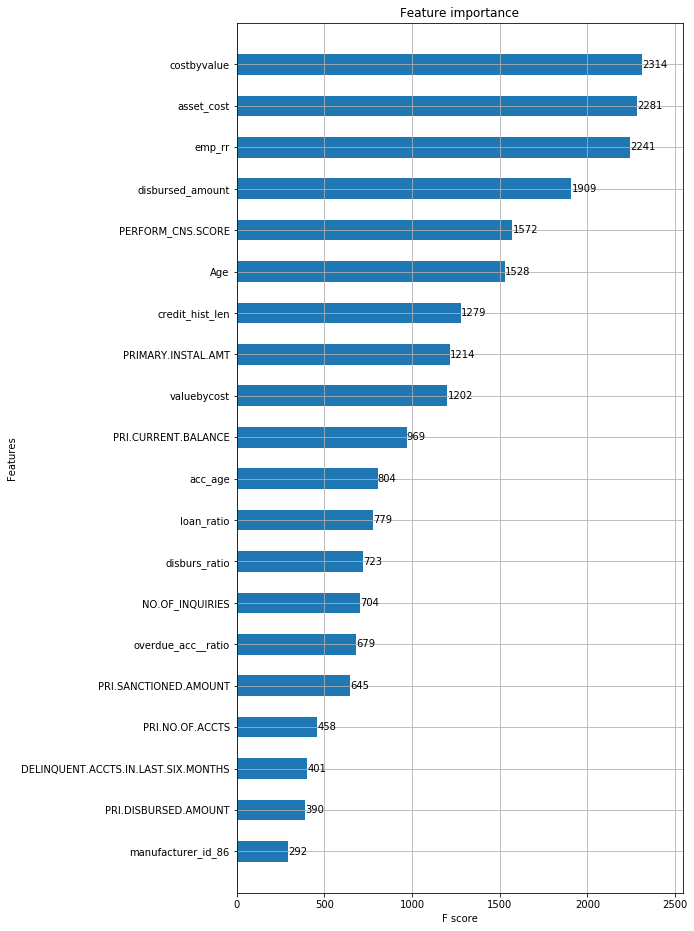

In [388]:
fig, ax = plt.subplots(1, 1, figsize=(8, 16))
xgb.plot_importance(model, max_num_features=20, height=0.5, ax=ax)